In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import plotly
plotly.offline.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('state2.csv', delimiter=',')
df.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,26150,46,5,1,0,0,1,0,0,0,0
1,6605,71,1,0,0,0,1,0,0,0,0
2,18548,38,8,0,1,1,0,0,0,0,0
3,47668,54,3,0,1,1,0,0,0,0,0
4,44554,59,9,2,1,0,0,0,0,1,0


In [3]:
# df=df.drop(['marital_status_1','marital_status_2','marital_status_3'], axis=1)

In [4]:
df.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,26150,46,5,1,0,0,1,0,0,0,0
1,6605,71,1,0,0,0,1,0,0,0,0
2,18548,38,8,0,1,1,0,0,0,0,0
3,47668,54,3,0,1,1,0,0,0,0,0
4,44554,59,9,2,1,0,0,0,0,1,0


In [5]:



#rescale df
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
df_scaled.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,0.154185,0.184312,0.408539,0.258591,-1.127172,-0.765498,1.056479,-0.262049,-0.511688,-0.49707,-0.569621
1,-0.726524,1.493070,-1.087435,-0.648298,-1.127172,-0.765498,1.056479,-0.262049,-0.511688,-0.49707,-0.569621
2,-0.188366,-0.234490,1.530520,-0.648298,0.887176,1.306339,-0.946541,-0.262049,-0.511688,-0.49707,-0.569621
3,1.123798,0.603115,-0.339448,-0.648298,0.887176,1.306339,-0.946541,-0.262049,-0.511688,-0.49707,-0.569621
4,0.983479,0.864867,1.904514,1.165479,0.887176,-0.765498,-0.946541,-0.262049,-0.511688,2.01179,-0.569621


In [6]:
# import Kmeans from sklearn
from sklearn.cluster import KMeans


inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    inertias.append(kmeanModel.inertia_)

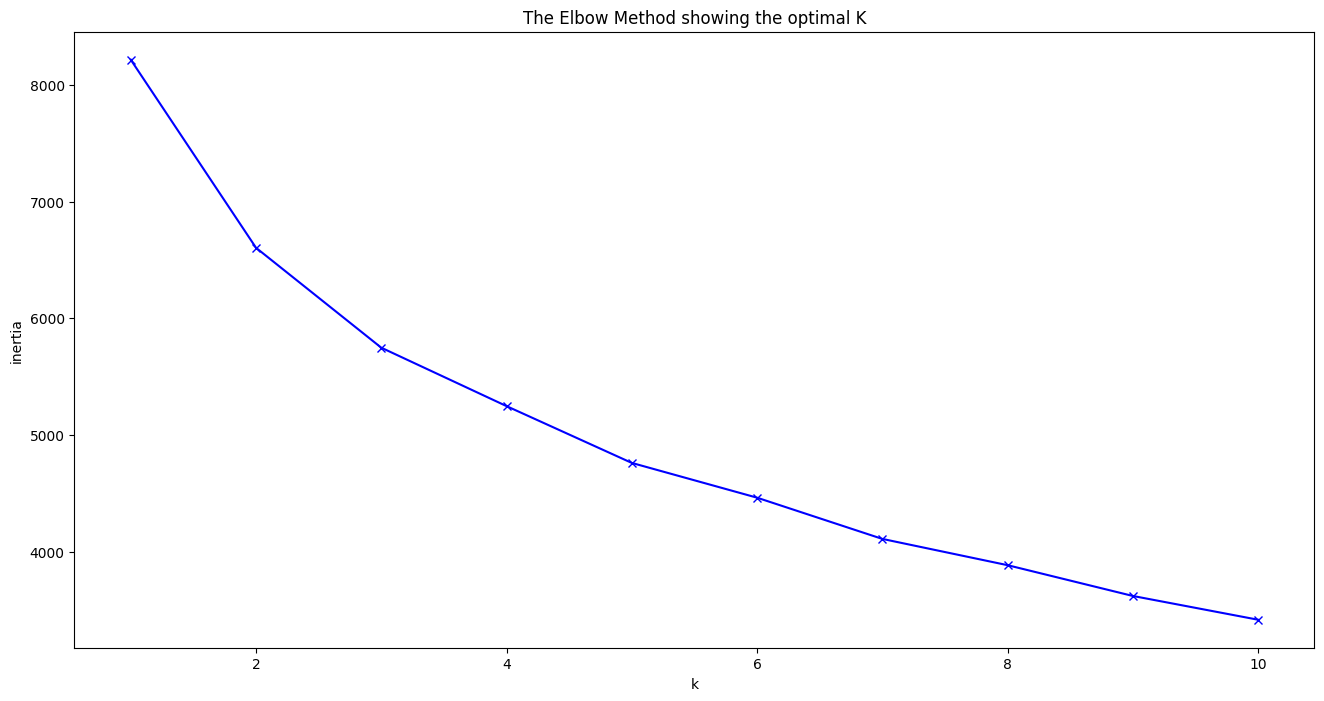

In [7]:
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [8]:
from sklearn.metrics import silhouette_score

silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    label=kmeanModel.predict(df_scaled)
    silhouettes.append(silhouette_score(df_scaled,label))

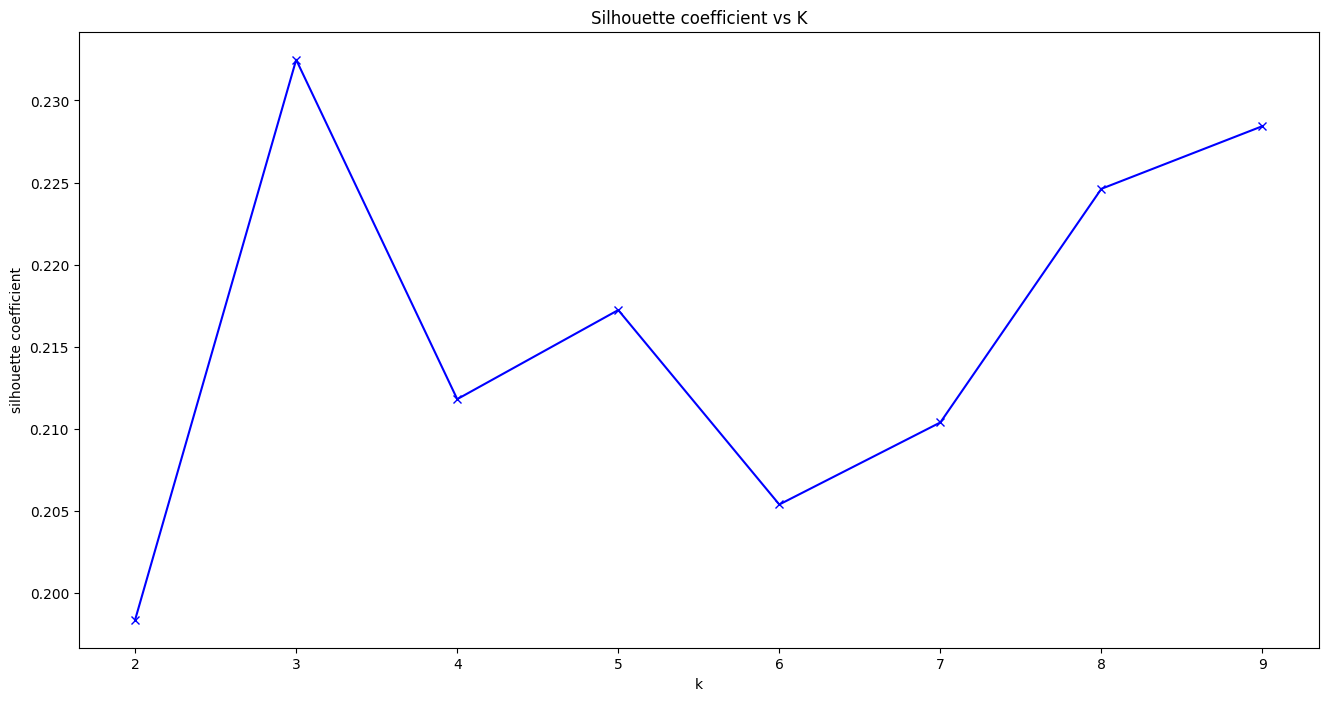

In [9]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [10]:
km = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(df_scaled)

In [11]:
y_km

array([0, 0, 2, 2, 1, 3, 2, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 1,
       3, 1, 3, 1, 0, 1, 0, 0, 3, 0, 3, 3, 2, 3, 2, 0, 2, 1, 1, 0, 0, 1,
       2, 1, 0, 0, 4, 1, 1, 2, 0, 0, 2, 1, 3, 3, 2, 0, 1, 2, 1, 1, 0, 2,
       2, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2, 1, 4, 2, 2, 3, 0, 3, 0,
       2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 3, 0, 0, 0, 1, 0, 0, 4, 1, 1, 1, 2,
       2, 3, 0, 2, 3, 0, 0, 0, 0, 1, 4, 3, 4, 0, 2, 2, 1, 4, 0, 2, 0, 0,
       2, 0, 0, 2, 2, 0, 2, 2, 4, 3, 0, 0, 0, 2, 3, 0, 3, 0, 2, 3, 3, 0,
       3, 4, 2, 1, 3, 1, 3, 0, 2, 0, 0, 0, 3, 0, 1, 2, 0, 3, 1, 0, 0, 0,
       0, 0, 1, 0, 2, 2, 2, 2, 3, 0, 0, 3, 2, 0, 2, 1, 2, 2, 0, 1, 2, 2,
       0, 4, 4, 0, 2, 1, 3, 4, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 4,
       3, 0, 0, 3, 2, 0, 2, 1, 4, 0, 2, 2, 2, 2, 1, 2, 0, 3, 2, 3, 0, 2,
       2, 1, 1, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 1, 1, 0,
       2, 1, 3, 2, 4, 4, 4, 1, 2, 2, 3, 1, 2, 0, 3, 1, 1, 3, 1, 3, 0, 2,
       4, 1, 0, 2, 2, 1, 3, 2, 3, 2, 1, 0, 2, 1, 2,

In [12]:
df_scaled_with_clusters =df_scaled.copy()
df_scaled_with_clusters['label']=y_km
df_scaled_with_clusters.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South,label
0,0.154185,0.184312,0.408539,0.258591,-1.127172,-0.765498,1.056479,-0.262049,-0.511688,-0.49707,-0.569621,0
1,-0.726524,1.493070,-1.087435,-0.648298,-1.127172,-0.765498,1.056479,-0.262049,-0.511688,-0.49707,-0.569621,0
2,-0.188366,-0.234490,1.530520,-0.648298,0.887176,1.306339,-0.946541,-0.262049,-0.511688,-0.49707,-0.569621,2
3,1.123798,0.603115,-0.339448,-0.648298,0.887176,1.306339,-0.946541,-0.262049,-0.511688,-0.49707,-0.569621,2
4,0.983479,0.864867,1.904514,1.165479,0.887176,-0.765498,-0.946541,-0.262049,-0.511688,2.01179,-0.569621,1


In [13]:
df_scaled_with_clusters['label'].value_counts()

label
0    247
2    215
1    140
3     97
4     48
Name: count, dtype: int64

In [14]:
df_with_clusters =df.copy()
df_with_clusters['label']=y_km
df_with_clusters.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South,label
0,26150,46,5,1,0,0,1,0,0,0,0,0
1,6605,71,1,0,0,0,1,0,0,0,0,0
2,18548,38,8,0,1,1,0,0,0,0,0,2
3,47668,54,3,0,1,1,0,0,0,0,0,2
4,44554,59,9,2,1,0,0,0,0,1,0,1


In [15]:
cluster_0_means = df[df_scaled_with_clusters['label']==0].mean()
cluster_1_means = df[df_scaled_with_clusters['label']==1].mean()
cluster_2_means = df[df_scaled_with_clusters['label']==2].mean()
cluster_3_means = df[df_scaled_with_clusters['label']==3].mean()
cluster_4_means = df[df_scaled_with_clusters['label']==4].mean()
means= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means,cluster_3_means,cluster_4_means])
means

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,26620.412955,48.708502,4.109312,1.222672,0.530364,0.000000,0.813765,0.0,0.000000,0.000000,0.408907
1,22520.450000,43.164286,3.621429,0.585714,0.571429,0.400000,0.514286,0.0,0.000000,1.000000,0.000000
2,13079.158140,28.367442,3.906977,0.000000,0.567442,0.995349,0.000000,0.0,0.204651,0.000000,0.320930
3,27210.453608,54.958763,3.938144,0.876289,0.567010,0.061856,0.824742,0.0,1.000000,0.000000,0.000000
4,37468.500000,46.416667,3.645833,1.354167,0.625000,0.000000,0.000000,1.0,0.291667,0.166667,0.270833


In [16]:
cluster_0_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==0].mean()
cluster_1_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==1].mean()
cluster_2_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==2].mean()
cluster_3_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==3].mean()
cluster_3_means = df_scaled_with_clusters[df_scaled_with_clusters['label']==4].mean()
means= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means,cluster_3_means,cluster_4_means])
means=means.drop('label',axis=1)
means

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,0.175382,0.326103,0.075427,0.460530,-0.058834,-0.765498,0.683447,-0.262049,-0.511688,-0.497070,0.381159
1,-0.009365,0.035862,-0.107038,-0.117120,0.023884,0.063237,0.083584,-0.262049,-0.511688,2.011790,-0.569621
2,-0.434795,-0.738758,-0.000245,-0.648298,0.015853,1.296703,-0.946541,-0.262049,-0.007017,-0.497070,0.176598
3,0.664203,0.206125,-0.097910,0.579781,0.131796,-0.765498,-0.946541,3.816084,0.207564,-0.078927,0.060114
4,37468.500000,46.416667,3.645833,1.354167,0.625000,0.000000,0.000000,1.000000,0.291667,0.166667,0.270833


In [17]:
import plotly.graph_objects as go


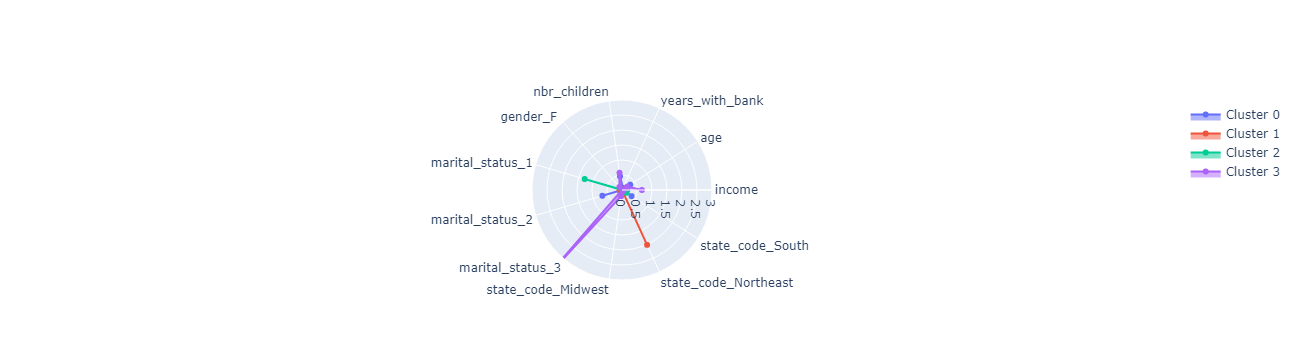

In [18]:

features = list(means.columns)

fig = go.Figure()

clusters=[0,1,2,3]

for c in clusters:
    fig.add_trace(go.Scatterpolar(
          r=list(means.loc[c]),
          theta=features,
          fill='toself',
          name='Cluster '+str(c)
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 3]
        )),
      showlegend=True
    )

fig.show()

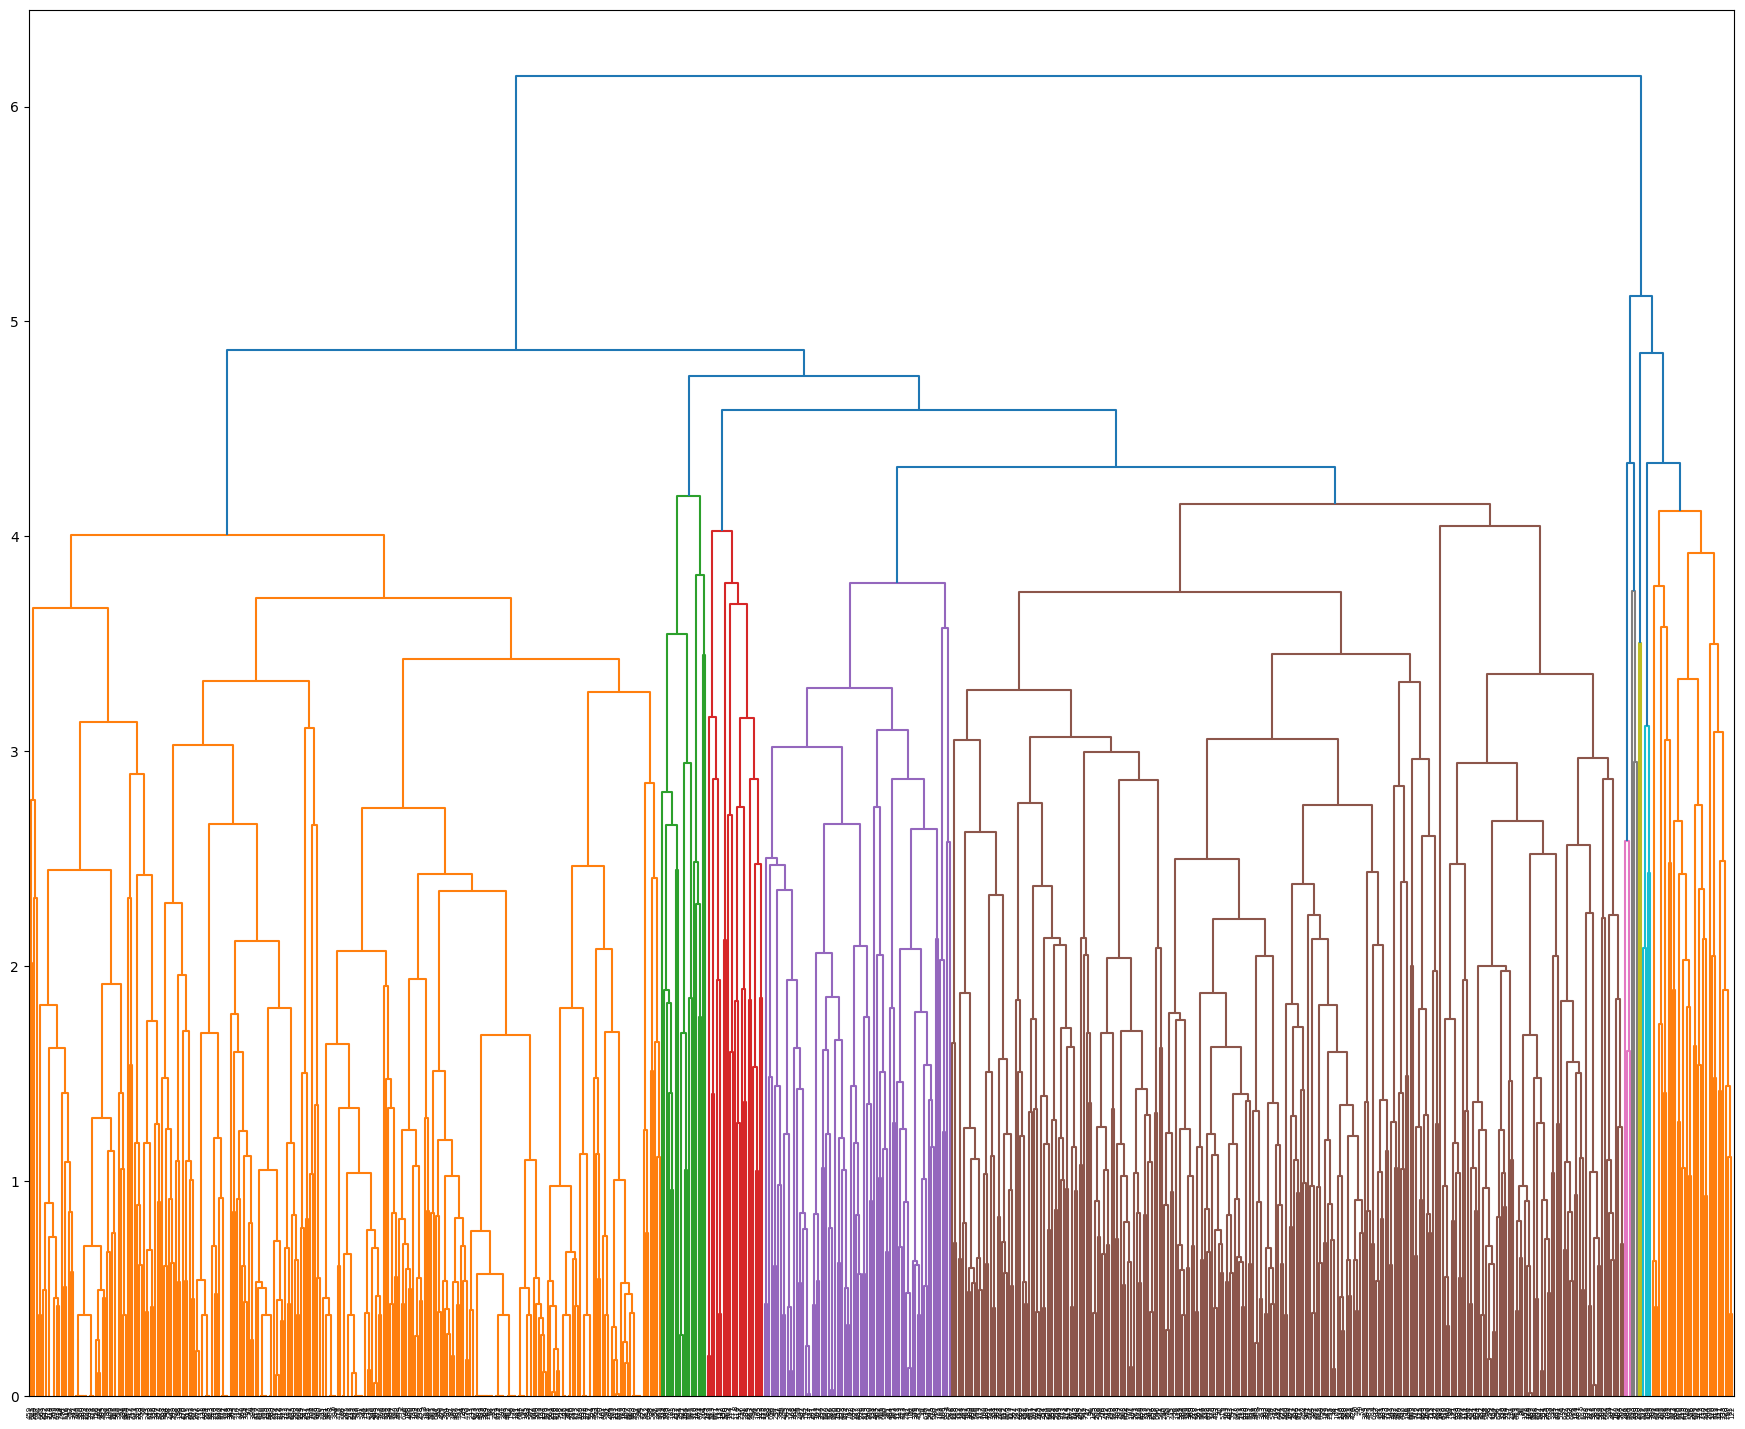

In [19]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'average' 

linkage_matrix = linkage(df_scaled, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

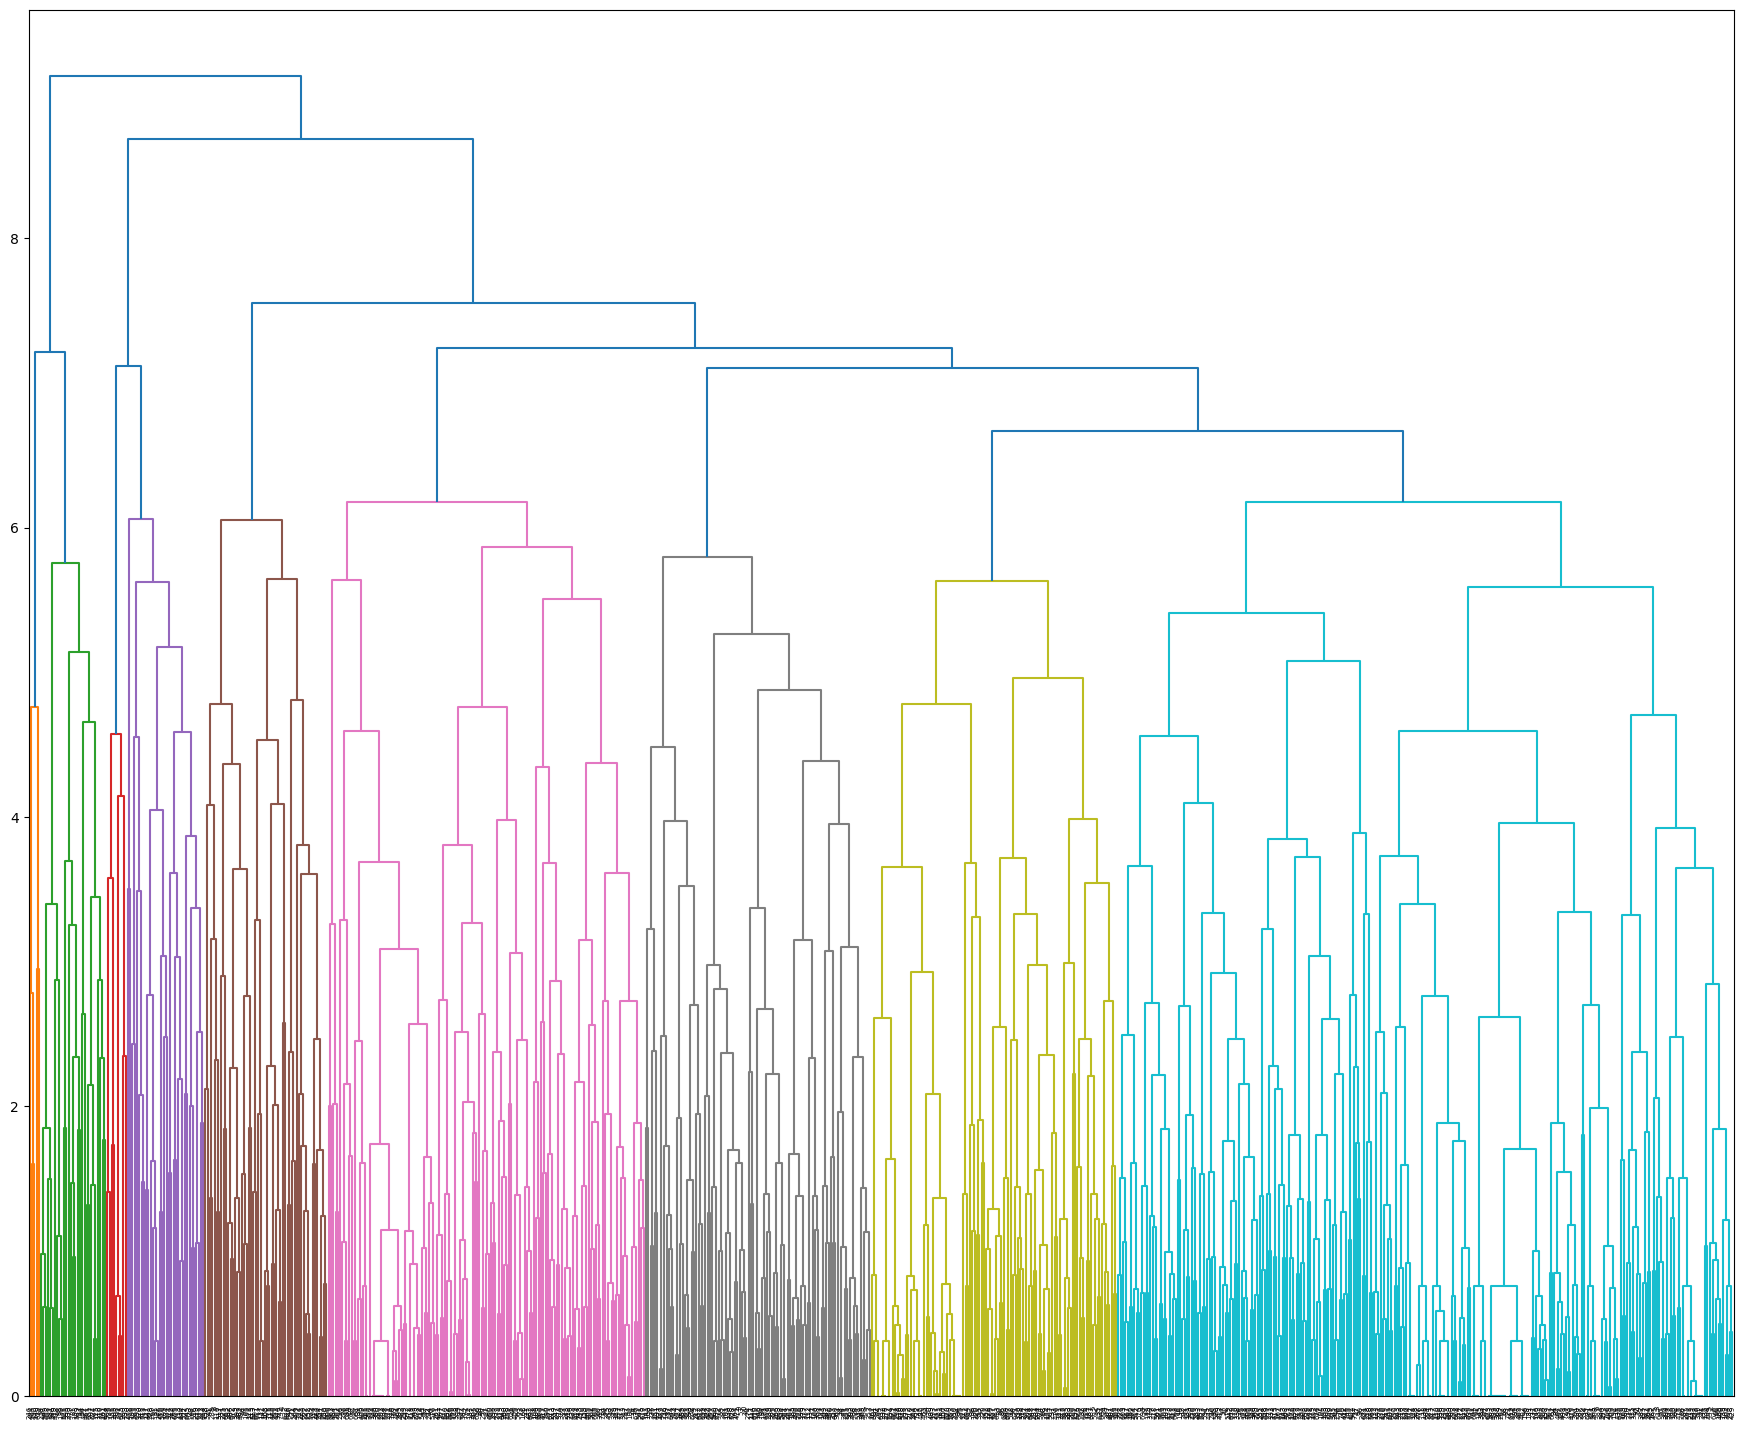

In [20]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'complete' 

linkage_matrix = linkage(df_scaled, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

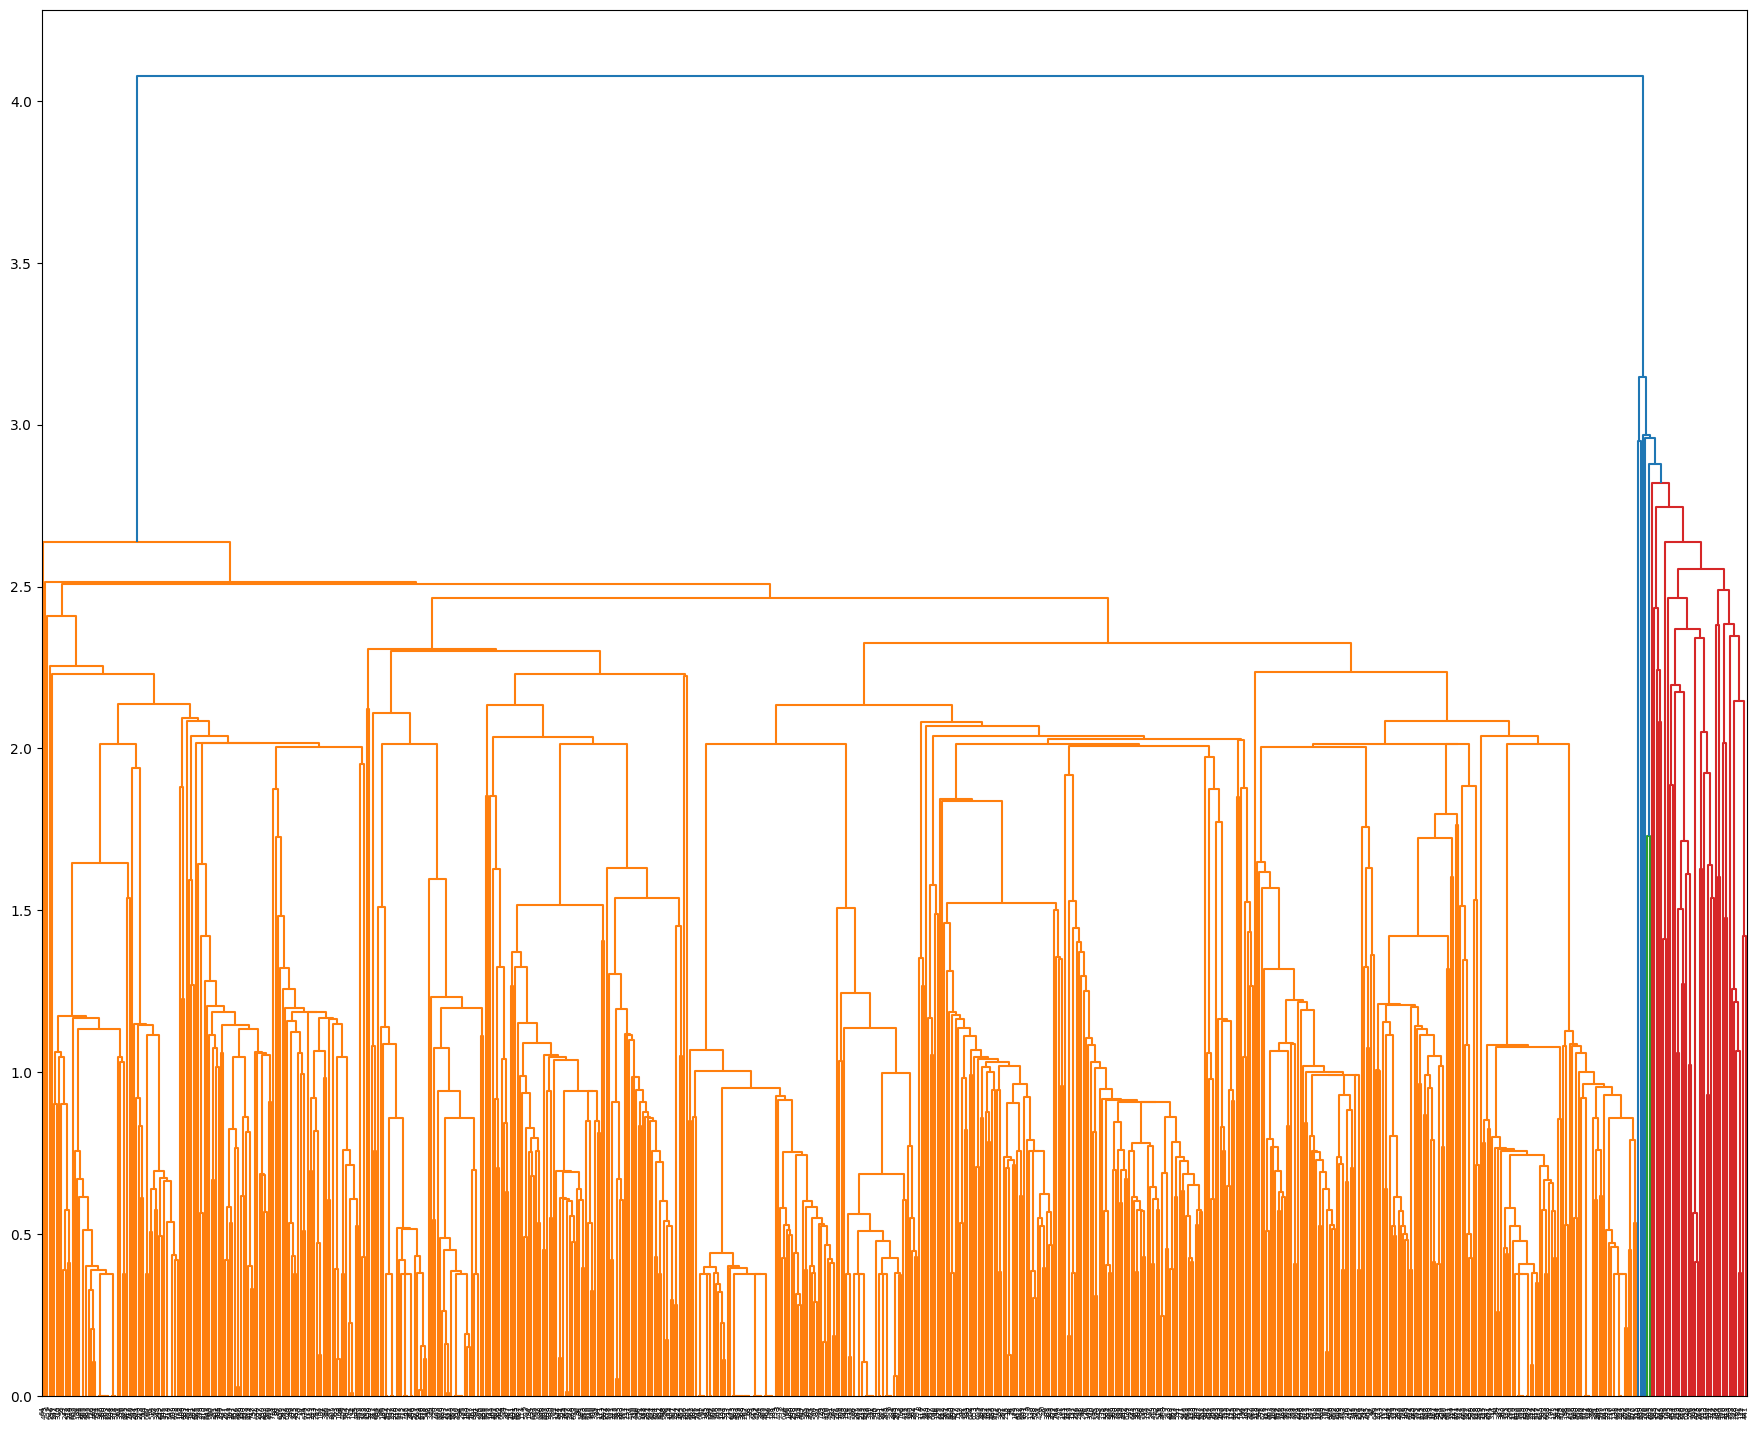

In [21]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'single' 

linkage_matrix = linkage(df_scaled, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering
# single
single = AgglomerativeClustering(n_clusters=2, linkage="single")
single_pred = single.fit_predict(df_scaled)

# complete
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(df_scaled)

# average
avg = AgglomerativeClustering(n_clusters=2, linkage="average")
avg_pred = avg.fit_predict(df_scaled)

In [23]:
# comparing the 3 linkage using silhouette score
single_silhouette = silhouette_score(df_scaled, single_pred)
complete_silhouette = silhouette_score(df_scaled, complete_pred)
avg_silhouette = silhouette_score(df_scaled, avg_pred)

print( "Scores: \nSingle:", single_silhouette,"\nComplete: ", complete_silhouette, "\nAverage: ", avg_silhouette)

Scores: 
Single: 0.2990372504966227 
Complete:  0.18972053964434113 
Average:  0.2990372504966227


In [24]:
avg_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [25]:
df2_with_clusters =df_scaled.copy()
df2_with_clusters['label']=avg_pred
df2_with_clusters.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South,label
0,0.154185,0.184312,0.408539,0.258591,-1.127172,-0.765498,1.056479,-0.262049,-0.511688,-0.49707,-0.569621,1
1,-0.726524,1.493070,-1.087435,-0.648298,-1.127172,-0.765498,1.056479,-0.262049,-0.511688,-0.49707,-0.569621,1
2,-0.188366,-0.234490,1.530520,-0.648298,0.887176,1.306339,-0.946541,-0.262049,-0.511688,-0.49707,-0.569621,1
3,1.123798,0.603115,-0.339448,-0.648298,0.887176,1.306339,-0.946541,-0.262049,-0.511688,-0.49707,-0.569621,1
4,0.983479,0.864867,1.904514,1.165479,0.887176,-0.765498,-0.946541,-0.262049,-0.511688,2.01179,-0.569621,1


In [26]:
cluster_0_means = df2_with_clusters[df2_with_clusters['label']==0].mean()
cluster_1_means = df2_with_clusters[df2_with_clusters['label']==1].mean()
means2= pd.DataFrame([cluster_0_means,cluster_1_means])
means2=means2.drop('label',axis=1)
means2

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,0.664203,0.206125,-0.097910,0.579781,0.131796,-0.765498,-0.946541,3.816084,0.207564,-0.078927,0.060114
1,-0.045610,-0.014155,0.006723,-0.039813,-0.009050,0.052566,0.064998,-0.262049,-0.014253,0.005420,-0.004128


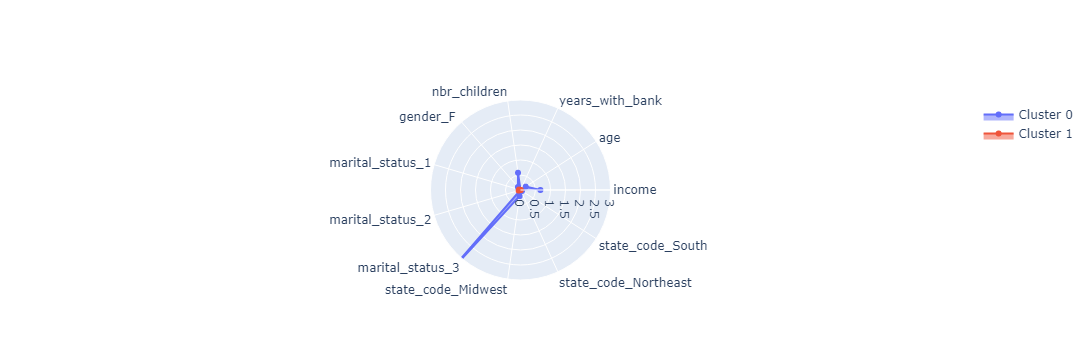

In [27]:

features = list(means2.columns)

fig = go.Figure()

clusters=[0,1]

for c in clusters:
    fig.add_trace(go.Scatterpolar(
          r=list(means2.loc[c]),
          theta=features,
          fill='toself',
          name='Cluster '+str(c)
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 3]
        )),
      showlegend=True
    )

fig.show()

In [28]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

In [29]:
# Compute DBSCAN
db = DBSCAN(eps=2.5, min_samples=20)
db.fit(df_scaled) #algorithm runs

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
#core_samples_mask will be True if the data point was a core point. Otherwise false.

labels = db.labels_
#actual cluster label. If outliers, gets assigned -1

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) #number of unique clusters labels (excluding -1)
n_noise_ = list(labels).count(-1) #counts how many outliers there are (labels with -1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)




Estimated number of clusters: 3
Estimated number of noise points: 61


In [30]:
df3_with_clusters =df_scaled.copy()
df3_with_clusters['label']=labels
df3_with_clusters.head()

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South,label
0,0.154185,0.184312,0.408539,0.258591,-1.127172,-0.765498,1.056479,-0.262049,-0.511688,-0.49707,-0.569621,0
1,-0.726524,1.493070,-1.087435,-0.648298,-1.127172,-0.765498,1.056479,-0.262049,-0.511688,-0.49707,-0.569621,0
2,-0.188366,-0.234490,1.530520,-0.648298,0.887176,1.306339,-0.946541,-0.262049,-0.511688,-0.49707,-0.569621,0
3,1.123798,0.603115,-0.339448,-0.648298,0.887176,1.306339,-0.946541,-0.262049,-0.511688,-0.49707,-0.569621,0
4,0.983479,0.864867,1.904514,1.165479,0.887176,-0.765498,-0.946541,-0.262049,-0.511688,2.01179,-0.569621,-1


In [31]:
cluster_0_means = df3_with_clusters[df3_with_clusters['label']==0].mean()
cluster_1_means = df3_with_clusters[df3_with_clusters['label']==1].mean()
cluster_2_means = df3_with_clusters[df3_with_clusters['label']==2].mean()


means3= pd.DataFrame([cluster_0_means,cluster_1_means,cluster_2_means])
means3=means3.drop('label',axis=1)
means3

,income,age,years_with_bank,nbr_children,gender_F,marital_status_1,marital_status_2,marital_status_3,state_code_Midwest,state_code_Northeast,state_code_South
0,-0.107195,-0.034355,0.038640,-0.057496,-0.009723,0.062481,0.065935,-0.262049,0.118313,-0.49707,0.134720
1,0.092457,0.430742,-0.052111,0.236472,-0.021737,-0.765498,0.812208,-0.262049,-0.511688,2.01179,-0.569621
2,-0.230688,-0.568223,-0.232593,-0.648298,0.095825,1.306339,-0.946541,-0.262049,-0.511688,2.01179,-0.569621


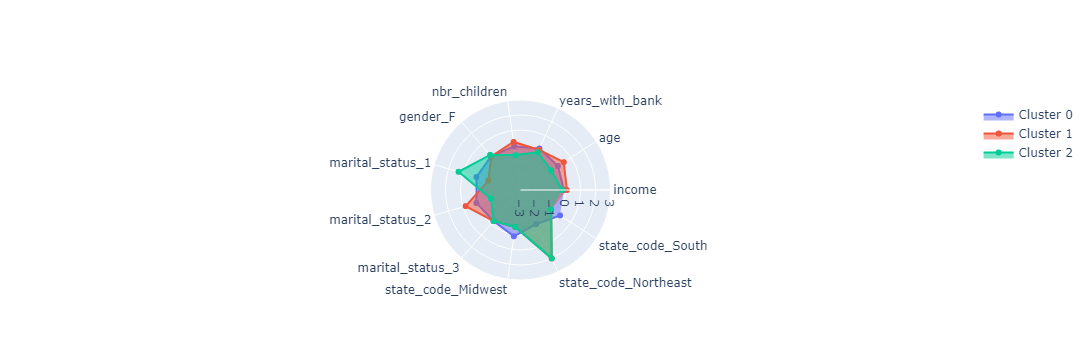

In [32]:
features = list(means3.columns)

fig = go.Figure()

clusters=[0,1,2]

for c in clusters:
    fig.add_trace(go.Scatterpolar(
          r=list(means3.loc[c]),
          theta=features,
          fill='toself',
          name='Cluster '+str(c)
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[-3, 3]
        )),
      showlegend=True
    )

fig.show()

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(df_scaled)


In [34]:
explained_variance= np.insert(pca.explained_variance_ratio_,0,0)

In [35]:
# preparing the cumulative variance
cumulative_variance=np.cumsum(np.round(explained_variance, decimals=3))

In [36]:
pc_df=pd.DataFrame(['','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'], columns=['PC'])
explained_variance_df= pd.DataFrame(explained_variance,columns=['Explained Variance'])
cumulative_variance_df= pd.DataFrame(cumulative_variance,columns=['Cumulative Variance'])
df_explained_variance= pd.concat([pc_df,explained_variance_df,cumulative_variance_df],axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.223025,0.223
2,PC2,0.122255,0.345
3,PC3,0.118075,0.463
4,PC4,0.114499,0.577
5,PC5,0.099445,0.676
6,PC6,0.095001,0.771
7,PC7,0.079906,0.851
8,PC8,0.064202,0.915
9,PC9,0.039166,0.954


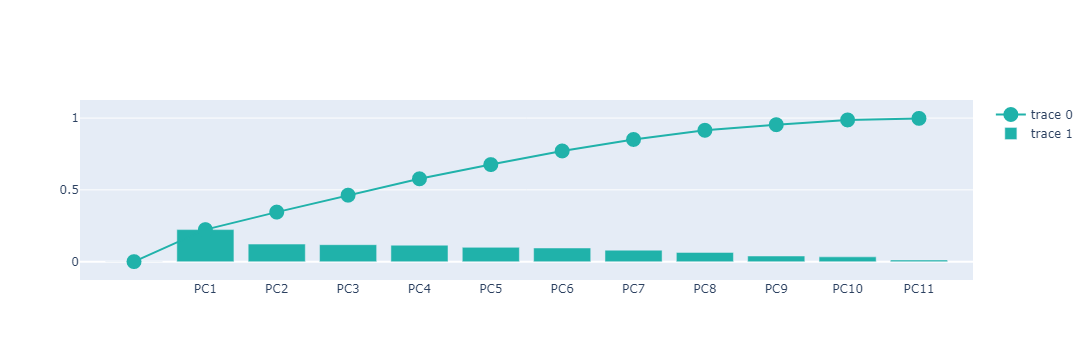

In [37]:
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(
    go.Scatter(
        x= df_explained_variance['PC'],
        y= df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="lightSeaGreen")
    ))
fig.add_trace(
    go.Bar(
        x = df_explained_variance['PC'],
        y = df_explained_variance['Explained Variance'],
        marker=dict(color="lightSeaGreen")
    ))
fig.show()

In [38]:
pca=PCA(n_components=4).set_output(transform="pandas")
df_pca = pca.fit_transform(df_scaled)
df_pca.head()

,pca0,pca1,pca2,pca3
0,1.250356,-0.284489,-0.463850,-0.038100
1,1.055861,-0.979385,-0.563446,-0.162682
2,-1.589740,-0.313339,-0.412933,-0.509672
3,-0.970384,0.059405,0.098073,-0.060697
4,1.076728,-0.581709,0.158818,1.551607


In [39]:
df_pca_with_clusters = df_pca.copy()
df_pca_with_clusters['label'] = df_scaled_with_clusters['label']
df_pca_with_clusters.head()

,pca0,pca1,pca2,pca3,label
0,1.250356,-0.284489,-0.463850,-0.038100,0
1,1.055861,-0.979385,-0.563446,-0.162682,0
2,-1.589740,-0.313339,-0.412933,-0.509672,2
3,-0.970384,0.059405,0.098073,-0.060697,2
4,1.076728,-0.581709,0.158818,1.551607,1


In [40]:
# to visualize centroids in PCA space
pca_centroids = pca.transform(km.cluster_centers_)
pca_centroids

,pca0,pca1,pca2,pca3
0,1.098955,0.271738,-0.701903,-0.016120
1,-0.105076,-1.111692,0.141104,1.737203
2,-1.913351,0.253999,-0.187289,-0.464007
3,1.196897,-0.860356,0.940544,-1.538532
4,0.802922,2.445051,2.138536,0.203591


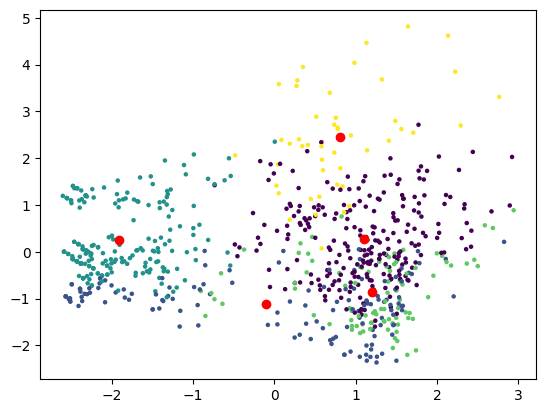

In [41]:
plt.scatter(df_pca_with_clusters['pca0'],df_pca_with_clusters['pca1'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'],pca_centroids['pca1'], c='red')
plt.show()

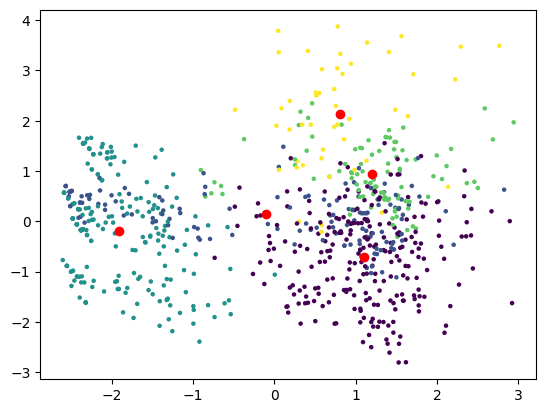

In [42]:
plt.scatter(df_pca_with_clusters['pca0'],df_pca_with_clusters['pca2'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'],pca_centroids['pca2'], c='red')
plt.show()

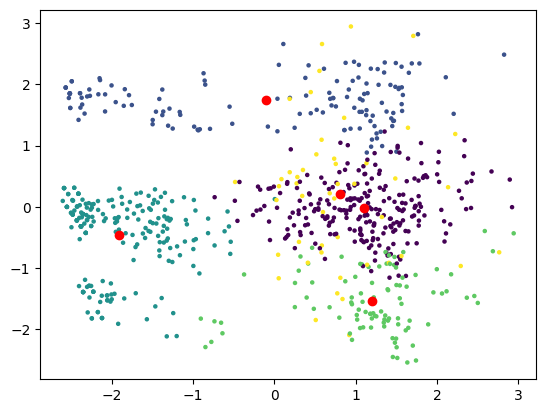

In [43]:
plt.scatter(df_pca_with_clusters['pca0'],df_pca_with_clusters['pca3'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'],pca_centroids['pca3'], c='red')
plt.show()